In [1]:
using DataFrames
using Gadfly
using Compose
set_default_plot_size(30cm, 12cm)

In [2]:
function meta_var(s::AbstractString,v::Any)
         s=Symbol(s) 
         @eval (($s) = ($v))
end

meta_var (generic function with 1 method)

In [3]:
# Get ready
home = "/home/german/labo/17/pdz/"
corta_Taa_dir = "run/lb/neq/temperatura/each_aa/corta/"
larga_Taa_dir = "run/lb/neq/temperatura/each_aa/larga/"
const aa_cnt = 132
const corta_frame_cnt = 2000
const larga_frame_cnt = 180

180

In [10]:
###
# Corta
###
molde = string("corta_temp_each_aa")
corta_T_each_aa = Array{Float64, 2}(corta_frame_cnt, aa_cnt)
for i = 1:aa_cnt
    T_mat = Array{Float64, 2}(corta_frame_cnt, 400)
    for j = 1:400
        # Read temperature
        T_mat[:, j] = readdlm(string(home, corta_Taa_dir, j, molde, i))[:, 2]
    end
    # Get the averages
    corta_T_each_aa[:, i] = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);
end

# Adapta la mtx y compila en dataframe
corta_T_each_aa_vec = reshape(corta_T_each_aa, size(corta_T_each_aa)[1] * size(corta_T_each_aa)[2])
Tcorta_T_each_aa_vec = reshape(transpose(corta_T_each_aa), size(corta_T_each_aa)[1] * size(corta_T_each_aa)[2])
df_corta_T_each_aa = DataFrame(T = corta_T_each_aa_vec,
    Time = repeat(collect(0.0005:0.0005:1), outer = [aa_cnt]),
    Residue = repeat(collect(1:aa_cnt), inner = [corta_frame_cnt]));

In [5]:
###
# Larga
###
molde = string("larga_temp_each_aa")
larga_T_each_aa = Array{Float64, 2}(larga_frame_cnt, aa_cnt)
for i = 1:aa_cnt
    T_mat = Array{Float64, 2}(larga_frame_cnt, 400)
    for j = 1:400
        # Read temperature
        T_mat[:, j] = readdlm(string(home, larga_Taa_dir, j, molde, i))[:, 2]
    end
    # Get the averages
    larga_T_each_aa[:, i] = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);
end

# Adapta la mtx y compila en dataframe
larga_T_each_aa_vec = reshape(larga_T_each_aa, size(larga_T_each_aa)[1] * size(larga_T_each_aa)[2])
Tlarga_T_each_aa_vec = reshape(transpose(larga_T_each_aa), size(larga_T_each_aa)[1] * size(larga_T_each_aa)[2])
df_larga_T_each_aa = DataFrame(T = larga_T_each_aa_vec,
    Time = repeat(collect(1.05:0.05:10), outer = [aa_cnt]),
    Residue = repeat(collect(1:aa_cnt), inner = [larga_frame_cnt]));

# Corta

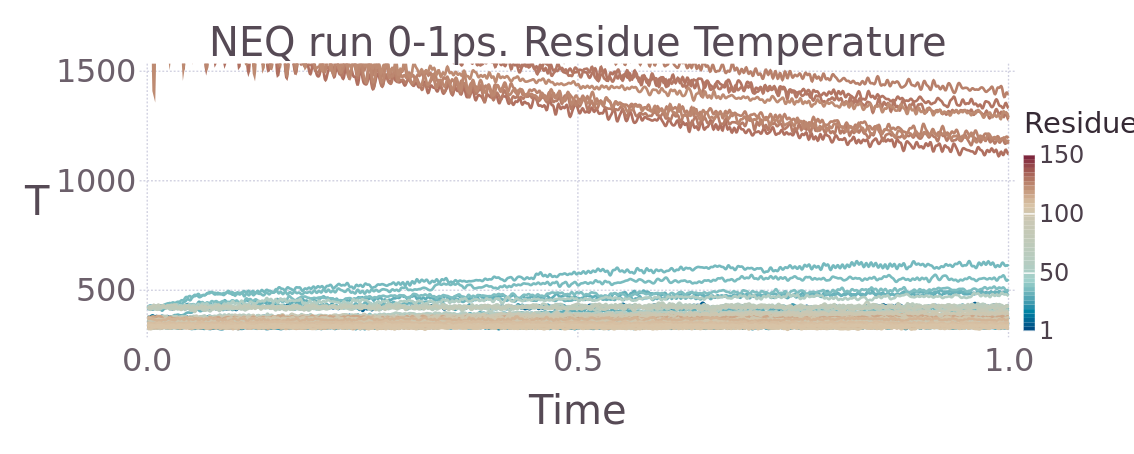

In [11]:
pdf_corta_T_each_aa = plot(df_corta_T_each_aa, Geom.line, x="Time", y="T", color = "Residue",
Guide.title("NEQ run 0-1ps. Residue Temperature"),
Coord.cartesian(xmin = 0., xmax = 1, ymax = 1500),
Theme(line_width = 2pt, grid_line_width = 1pt,
minor_label_font_size = 24pt, major_label_font_size = 30pt, key_label_font_size = 18pt,
key_title_font_size = 22pt))                                                      

## Larga

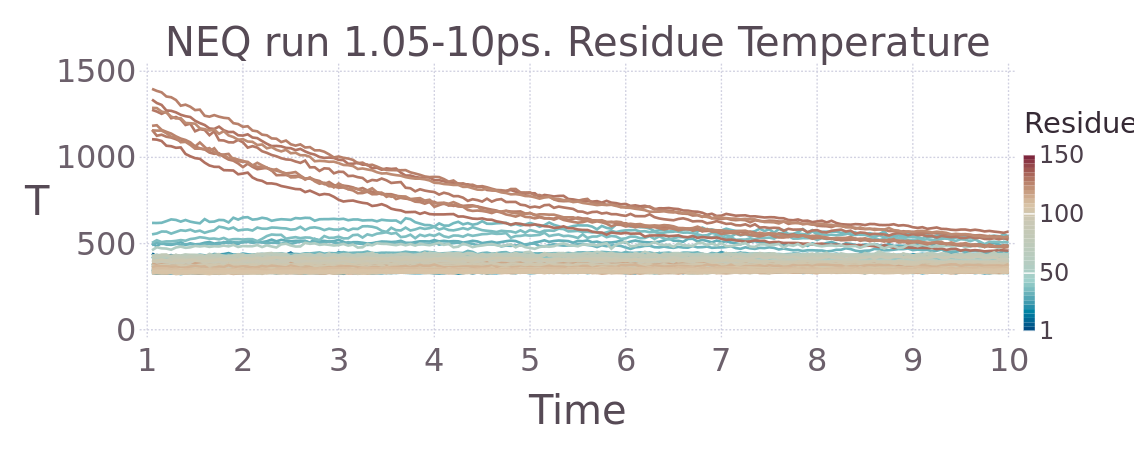

In [7]:
pdf_larga_T_each_aa = plot(df_larga_T_each_aa, Geom.line, x="Time", y="T", color = "Residue",
Guide.title("NEQ run 1.05-10ps. Residue Temperature"),
Coord.cartesian(xmin = 1., xmax = 10),
Theme(line_width = 2pt, grid_line_width = 1pt,
minor_label_font_size = 24pt, major_label_font_size = 30pt, key_label_font_size = 18pt,
key_title_font_size = 22pt))                                                      

### P/ la peli de temp

In [8]:
writetable(string(home, "run/lb/neq/avg_corrida/corta/Tcorta_T_each_aa_vec"),
    DataFrame(T = Tcorta_T_each_aa_vec), header = false)

LoadError: [91mUndefVarError: Tcorta_T_each_aa_vec not defined[39m

In [9]:
writetable(string(home, "run/lb/neq/avg_corrida/larga/Tlarga_T_each_aa_vec"),
    DataFrame(T = Tlarga_T_each_aa_vec), header = false)